In [50]:
import os
import math
import re
import statistics
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import product
from scipy.stats import pearsonr
from scipy.stats import kendalltau


#For proper display of all columns
from IPython.display import display
pd.options.display.max_columns = None

import warnings
warnings.filterwarnings("ignore")
import gc

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

import scipy.stats as stats

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

from catboost import CatBoostRegressor, Pool

In [51]:
all_backup_csv_path = '../backup_csv/backup_all_song_features_csv.csv'
bangladesh_backup_csv_path = '../backup_csv/backup_bangladesh_song_features_csv.csv'
kolkata_backup_csv_path = '../backup_csv/backup_kolkata_song_features_csv.csv'

In [52]:
scaled_all_backup_csv_path = '../backup_csv/scaled_backup_all_song_features_csv.csv'
scaled_bangladesh_backup_csv_path = '../backup_csv/scaled_backup_bangladesh_song_features_csv.csv'
scaled_kolkata_backup_csv_path = '../backup_csv/scaled_backup_kolkata_song_features_csv.csv'

In [53]:
alls = pd.read_csv(scaled_all_backup_csv_path)
bd = pd.read_csv(scaled_bangladesh_backup_csv_path)
ind = pd.read_csv(scaled_kolkata_backup_csv_path)

In [54]:
# alls.head(5).T

In [55]:
# bd.head(5).T

In [56]:
# ind.head(5).T

In [57]:
print("All Songs")
alls.describe([.1,.25,.5,.75,.9,.99]).T

All Songs


,count,mean,std,min,10%,25%,50%,75%,90%,99%,max
Country,146.0,0.500000,0.501721,0.0,0.000000,0.000000,0.500000,1.000000,1.000000,1.000000,1.0
Popularity,146.0,0.534402,0.236900,0.0,0.215909,0.363636,0.545455,0.727273,0.829545,1.000000,1.0
Time Signature,146.0,0.421233,0.200760,0.0,0.000000,0.500000,0.500000,0.500000,0.500000,0.775000,1.0
Duration MS,146.0,0.184061,0.112614,0.0,0.073650,0.104765,0.171338,0.232594,0.293757,0.486899,1.0
Tempo,146.0,0.440810,0.221787,0.0,0.143059,0.225375,0.471519,0.569124,0.712195,0.964065,1.0
Valence,146.0,0.415996,0.223958,0.0,0.138538,0.262507,0.383178,0.577240,0.722375,0.963057,1.0
Liveness,146.0,0.178687,0.157503,0.0,0.041029,0.080072,0.110044,0.273390,0.356101,0.734318,1.0
Instrumentalness,146.0,0.013987,0.090015,0.0,0.000000,0.000000,0.000020,0.000550,0.006798,0.295104,1.0
Acousticness,146.0,0.317305,0.325280,0.0,0.003670,0.028593,0.179520,0.606478,0.834361,0.949845,1.0
Speechiness,146.0,0.135629,0.158996,0.0,0.014593,0.046083,0.076421,0.160138,0.317588,0.722734,1.0


In [58]:
print("BD Songs")
bd.describe([.1,.25,.5,.75,.9,.99]).T

BD Songs


,count,mean,std,min,10%,25%,50%,75%,90%,99%,max
Country,73.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Popularity,73.0,0.611457,0.191397,0.227273,0.363636,0.454545,0.568182,0.750000,0.840909,0.983636,1.000000
Time Signature,73.0,0.383562,0.212795,0.000000,0.000000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
Duration MS,73.0,0.181020,0.127033,0.007364,0.069878,0.097332,0.169448,0.229656,0.287305,0.518556,1.000000
Tempo,73.0,0.464196,0.222622,0.000000,0.142703,0.339574,0.487379,0.594218,0.713006,0.913848,1.000000
Valence,73.0,0.401122,0.202748,0.018582,0.146564,0.263332,0.363386,0.508521,0.703793,0.855921,0.881253
Liveness,73.0,0.189092,0.170458,0.007115,0.042239,0.085735,0.116566,0.275465,0.352069,0.804482,1.000000
Instrumentalness,73.0,0.026195,0.126443,0.000000,0.000000,0.000000,0.000043,0.000416,0.011348,0.513220,1.000000
Acousticness,73.0,0.265454,0.305883,0.000000,0.000835,0.017585,0.102874,0.532918,0.764607,0.901810,0.903291
Speechiness,73.0,0.138796,0.162023,0.000000,0.014593,0.046083,0.075269,0.158986,0.390630,0.685407,0.784946


In [59]:
print("IND Songs")
ind.describe([.1,.25,.5,.75,.9,.99]).T

IND Songs


,count,mean,std,min,10%,25%,50%,75%,90%,99%,max
Country,73.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Popularity,73.0,0.457347,0.253673,0.000000,0.136364,0.250000,0.454545,0.636364,0.750000,1.000000,1.000000
Time Signature,73.0,0.458904,0.181686,0.000000,0.100000,0.500000,0.500000,0.500000,0.500000,1.000000,1.000000
Duration MS,73.0,0.187102,0.096871,0.000000,0.074380,0.115154,0.181540,0.232890,0.319022,0.461097,0.529903
Tempo,73.0,0.417424,0.219985,0.044300,0.145499,0.208632,0.470622,0.541400,0.663545,0.955383,0.978534
Valence,73.0,0.430870,0.243835,0.000000,0.124574,0.254535,0.393073,0.592084,0.780319,0.997625,1.000000
Liveness,73.0,0.168282,0.143817,0.000000,0.034650,0.076841,0.109451,0.225661,0.357761,0.589707,0.739120
Instrumentalness,73.0,0.001779,0.005269,0.000000,0.000000,0.000000,0.000018,0.000657,0.004610,0.027902,0.030885
Acousticness,73.0,0.369156,0.337739,0.000211,0.007410,0.041145,0.286003,0.674895,0.884567,0.968889,1.000000
Speechiness,73.0,0.132462,0.156967,0.000768,0.016590,0.046083,0.082181,0.163594,0.270046,0.712442,1.000000


<AxesSubplot: title={'center': 'All Songs : Top vs Bottom'}>

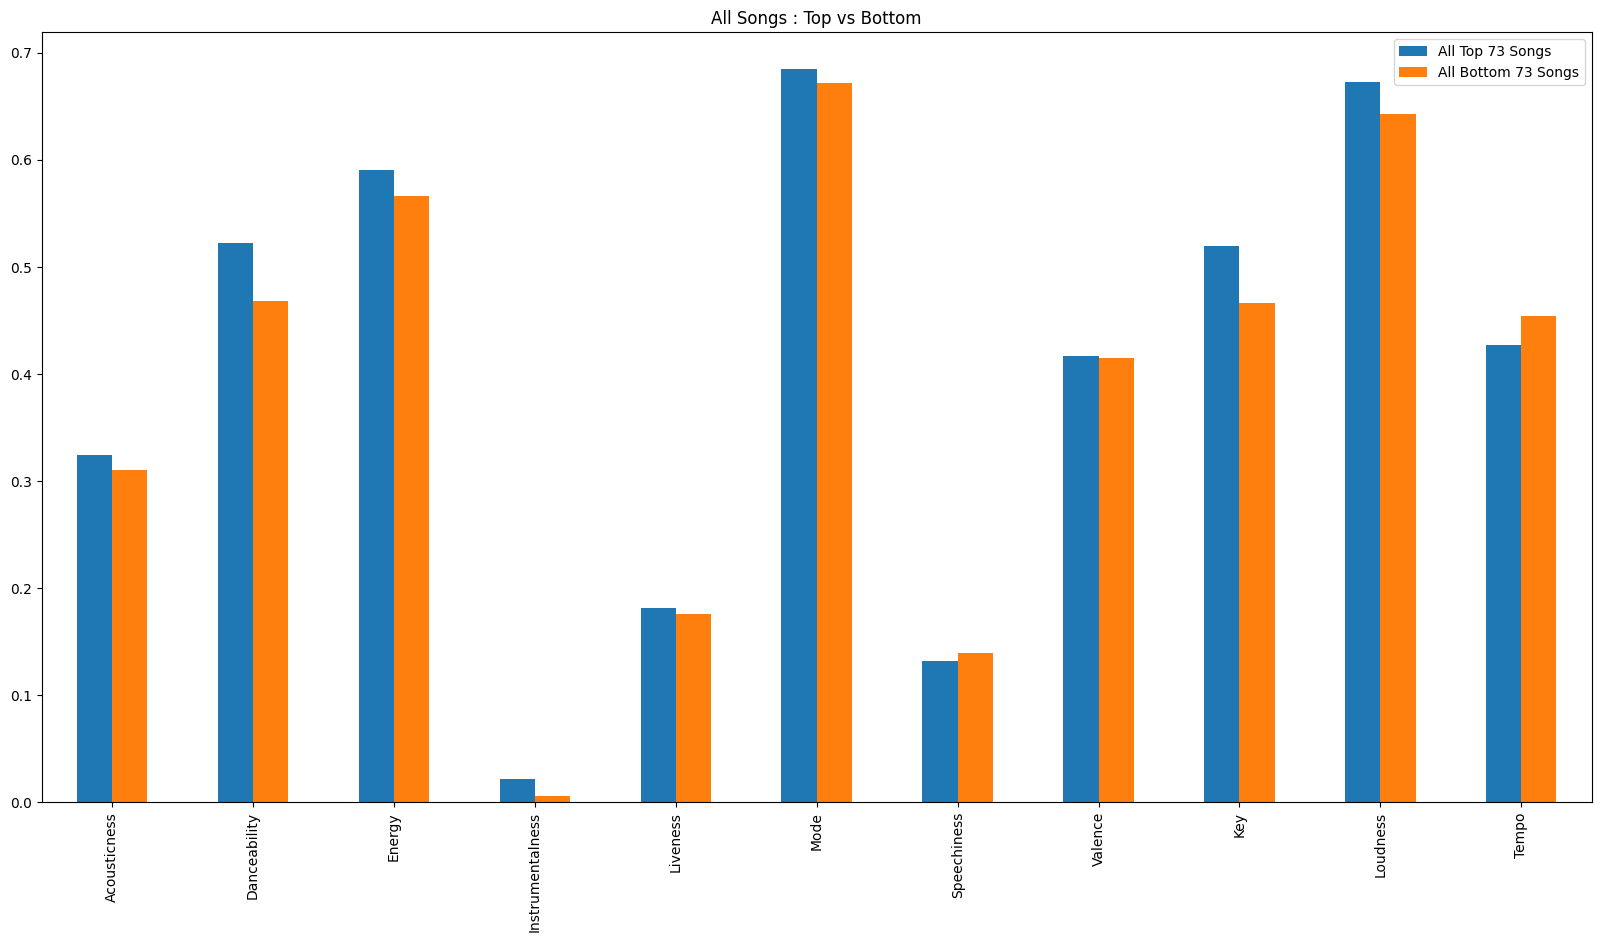

In [88]:
check = alls.sort_values(by = 'Popularity',ascending=False).head(73)[['Acousticness', 'Danceability','Energy', 'Instrumentalness', 'Liveness', 'Mode','Speechiness', 'Valence','Key','Loudness','Tempo']]
check = check.T
top = pd.DataFrame(check[check.columns].mean(axis = 1),columns = ['All Top 73 Songs'])

check = alls.sort_values(by = 'Popularity',ascending=False).tail(73)[['Acousticness', 'Danceability','Energy', 'Instrumentalness', 'Liveness', 'Mode','Speechiness', 'Valence','Key','Loudness','Tempo']]
check = check.T
bottom = pd.DataFrame(check[check.columns].mean(axis = 1),columns = ['All Bottom 73 Songs'])

# top_bottom = pd.concat([top,mid, bottom], axis = 1)
top_bottom = pd.concat([top, bottom], axis = 1)

top_bottom.plot(title = 'All Songs : Top vs Bottom', figsize=(20,10),linewidth=2,kind = 'bar' )

<AxesSubplot: title={'center': 'Top Popular Songs : Bd vs Ind'}>

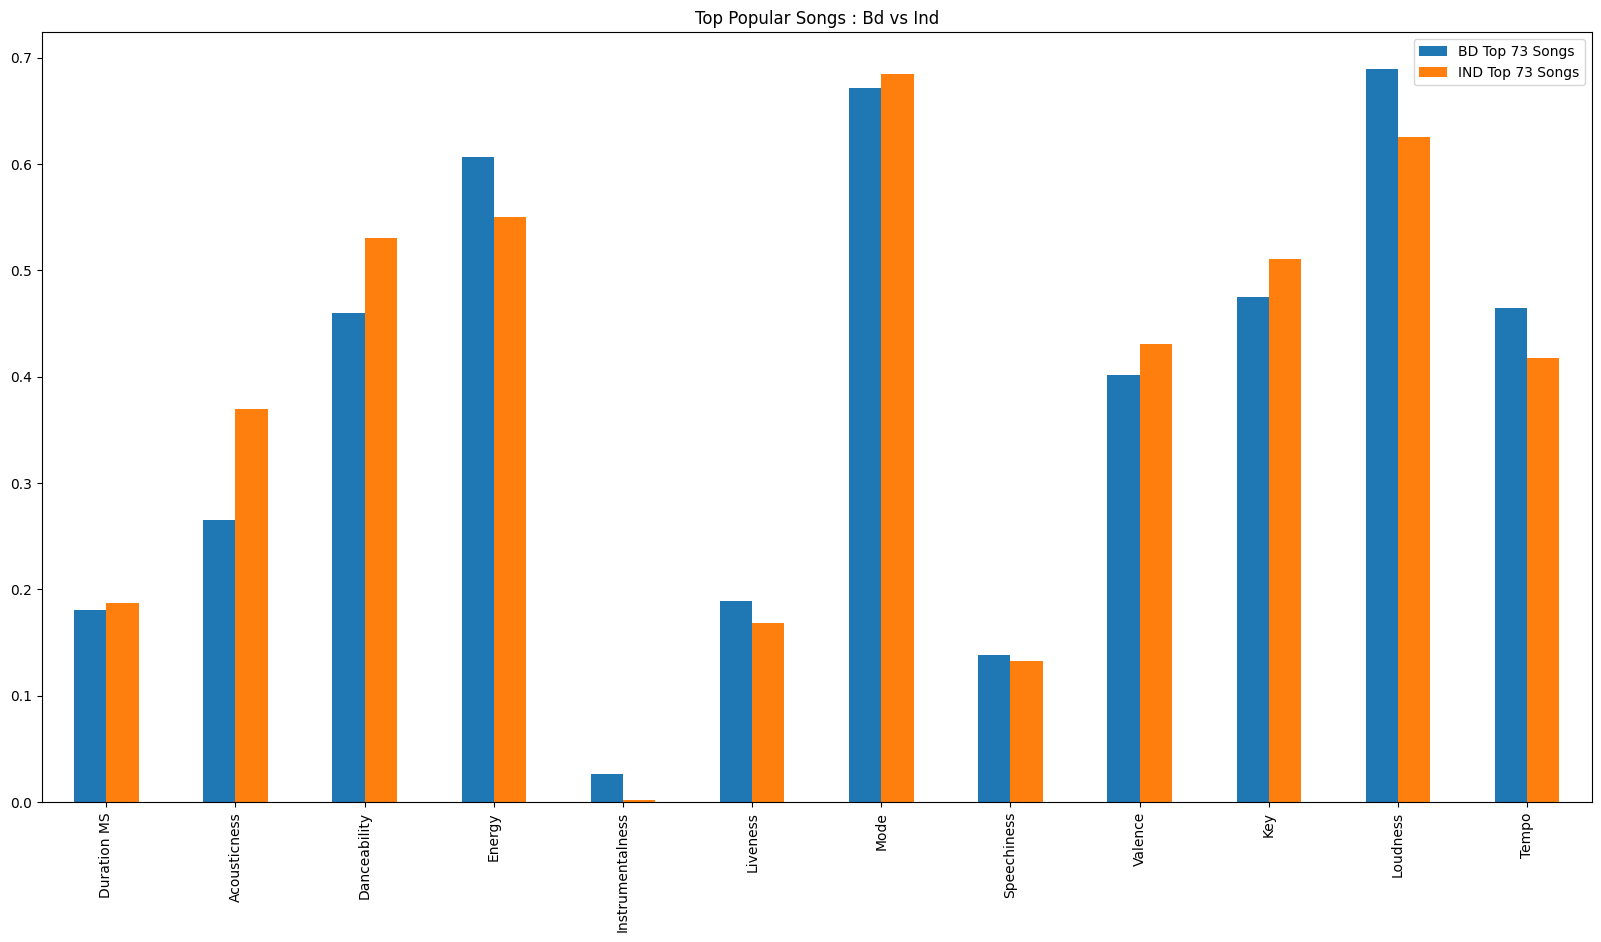

In [86]:
check = bd.sort_values(by = 'Popularity',ascending=False).head(73)[['Duration MS','Acousticness', 'Danceability','Energy', 'Instrumentalness', 'Liveness', 'Mode','Speechiness', 'Valence','Key','Loudness','Tempo']]
check = check.T
bd_top = pd.DataFrame(check[check.columns].mean(axis = 1),columns = ['BD Top 73 Songs'])

check = ind.sort_values(by = 'Popularity',ascending=False).head(73)[['Duration MS','Acousticness', 'Danceability','Energy', 'Instrumentalness', 'Liveness', 'Mode','Speechiness', 'Valence','Key','Loudness','Tempo']]
check = check.T
ind_top = pd.DataFrame(check[check.columns].mean(axis = 1),columns = ['IND Top 73 Songs'])

# top_bottom = pd.concat([top,mid, bottom], axis = 1)
top_bottom = pd.concat([bd_top, ind_top], axis = 1)

top_bottom.plot(title = 'Top Popular Songs : Bd vs Ind', figsize=(20,10),linewidth=2,kind = 'bar' )

Popularity    0.604608
dtype: float64


<AxesSubplot: title={'center': 'Popularity : Bd vs Ind'}>

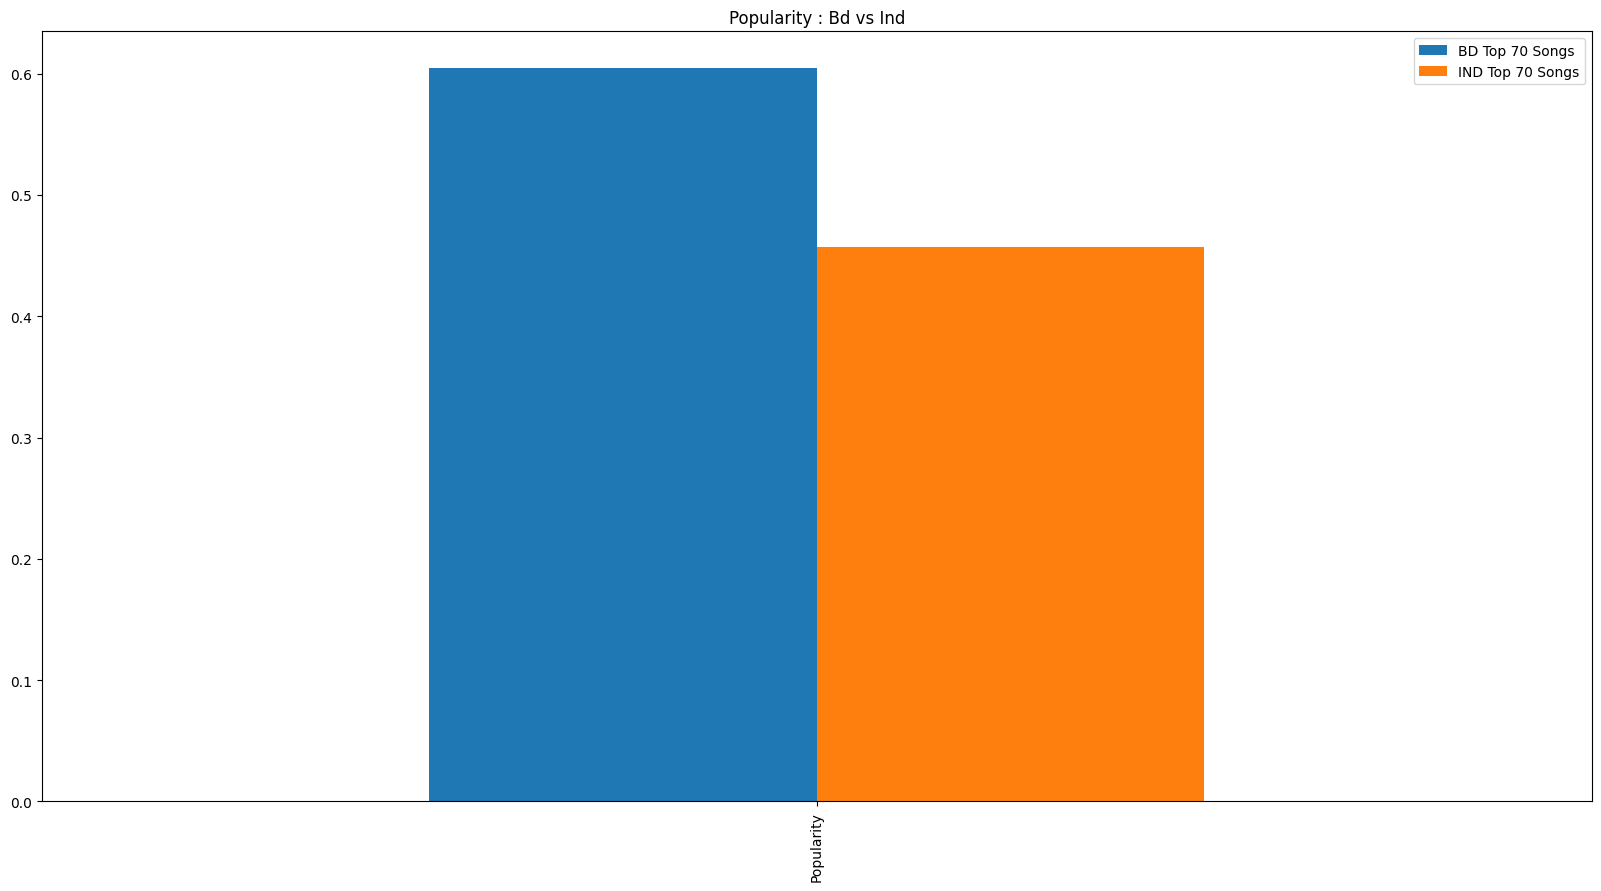

In [47]:
check = bd.sort_values(by = 'Popularity',ascending=False).head(73)[['Popularity']]
check = check.T
bd_top = pd.DataFrame(check[check.columns].mean(axis = 1),columns = ['BD Top 70 Songs'])
print(check[check.columns].mean(axis = 1))
check = ind.sort_values(by = 'Popularity',ascending=False).head(73)[['Popularity']]
check = check.T
ind_top = pd.DataFrame(check[check.columns].mean(axis = 1),columns = ['IND Top 70 Songs'])

# top_bottom = pd.concat([top,mid, bottom], axis = 1)
top_bottom = pd.concat([bd_top, ind_top], axis = 1)

top_bottom.plot(title = 'Popularity : Bd vs Ind', figsize=(20,10),linewidth=2,kind = 'bar')

<AxesSubplot: >

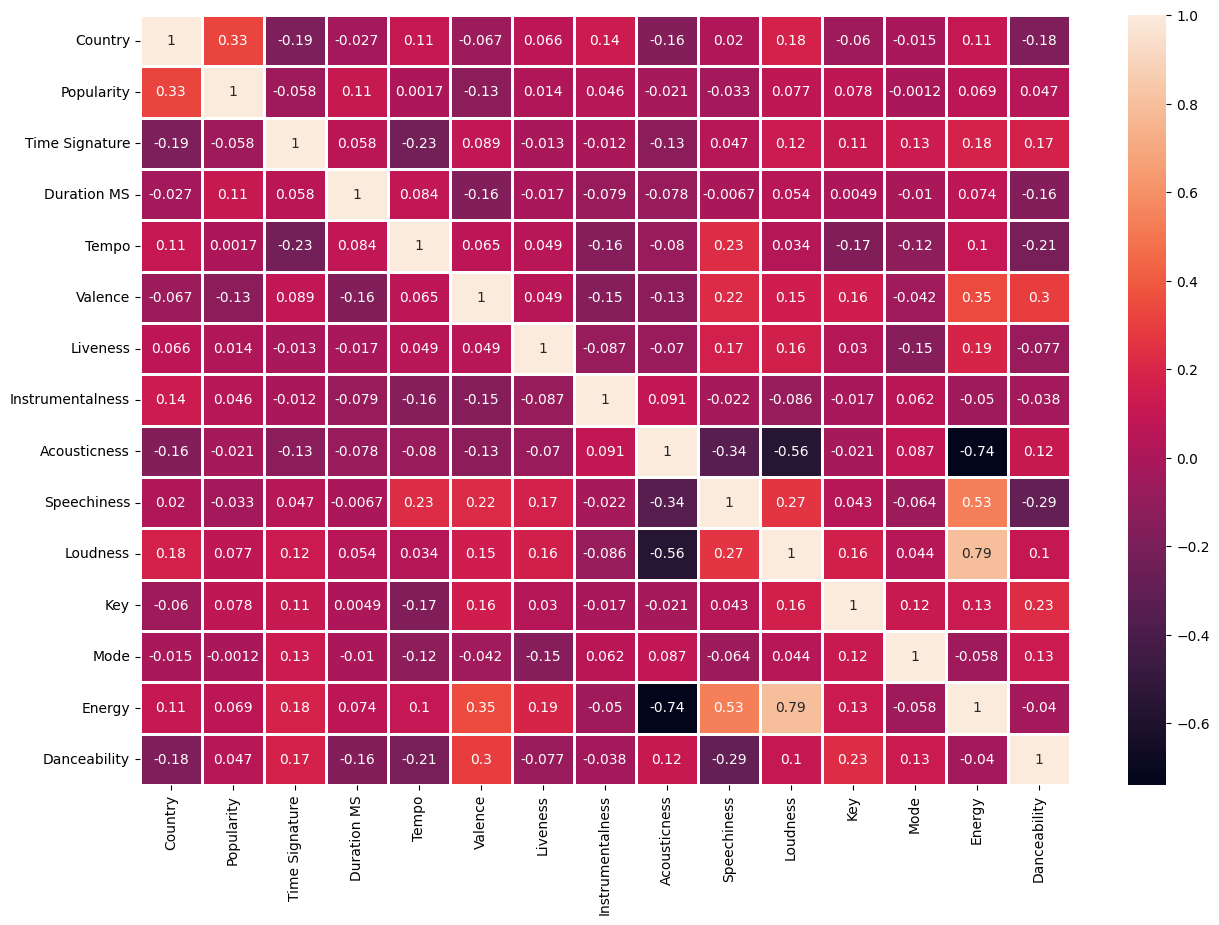

In [95]:
fig, ax = plt.subplots(figsize=(15,10))      
sns.heatmap(alls.corr(method='pearson'), annot=True,linewidths=.9, ax=ax)

**Stastical Analysis of Correlated Feature Starts**

In [63]:
scaled_all_song_correlated_features_csv_path = '../correlated_csv/scaled_all_song_correlated_features_csv.csv'
scaled_bangladesh_song_correlated_features_csv_path = '../correlated_csv/scaled_bangladesh_song_correlated_features_csv.csv'
scaled_kolkata_song_correlated_features_csv_path = '../correlated_csv/scaled_kolkata_song_correlated_features_csv.csv'

In [64]:
corr_alls = pd.read_csv(scaled_all_song_correlated_features_csv_path)
corr_bd = pd.read_csv(scaled_bangladesh_song_correlated_features_csv_path)
corr_ind = pd.read_csv(scaled_kolkata_song_correlated_features_csv_path)

In [65]:
corr_fieldnames = [
                    'Country', 
                    'Song Name', 
                    'Popularity', 
                    'Time Signature', 
                    'Duration MS', 
                    'Tempo', 
                    'Valence', 
                    'Liveness', 
                    'Instrumentalness', 
                    'Acousticness', 'Speechiness', 
                    'Loudness', 
                    'Key', 
                    'Mode', 
                    'Energy', 
                    'Danceability', 
                    'Energy-Loudness', 
                    'Energy-Speechiness', 
                    'Energy-Valence', 
                    'Energy-Liveness', 
                    'Energy-Tempo', 
                    'Acousticness-Mode', 
                    'Acousticness-Instrumentalness', 
                    'Acousticness-Danceability', 
                    'Danceability-Valence', 
                    'Danceability-Key', 
                    'Danceability-Mode', 
                    'Danceability-Loudness', 
                    'Danceability-Time Signature', 
                    'Loudness-Speechiness', 
                    'Loudness-Valence', 
                    'Loudness-Liveness', 
                    'Loudness-Key', 
                    'Loudness-Mode', 
                    'Loudness-Tempo', 
                    'Loudness-Time Signature', 
                    'Loudness-Duration MS', 
                    'Valence-Speechiness', 
                    'Valence-Key', 
                    'Valence-Liveness', 
                    'Valence-Tempo', 
                    'Valence-Time Signature', 
                    'Speechiness-Liveness', 
                    'Speechiness-Tempo', 
                    'Liveness-Tempo', 
                    'Liveness-Key', 
                    'Instrumentalness-Mode', 
                    'Tempo-Duration MS', 
                    'Key-Mode', 
                    'Key-Duration MS', 
                    'Key-Time Signature', 
                    'Duration MS-Time Signature'
                   ]

In [66]:
for i in range(len(corr_fieldnames)):
    print(i,corr_fieldnames[i])

0 Country
1 Song Name
2 Popularity
3 Time Signature
4 Duration MS
5 Tempo
6 Valence
7 Liveness
8 Instrumentalness
9 Acousticness
10 Speechiness
11 Loudness
12 Key
13 Mode
14 Energy
15 Danceability
16 Energy-Loudness
17 Energy-Speechiness
18 Energy-Valence
19 Energy-Liveness
20 Energy-Tempo
21 Acousticness-Mode
22 Acousticness-Instrumentalness
23 Acousticness-Danceability
24 Danceability-Valence
25 Danceability-Key
26 Danceability-Mode
27 Danceability-Loudness
28 Danceability-Time Signature
29 Loudness-Speechiness
30 Loudness-Valence
31 Loudness-Liveness
32 Loudness-Key
33 Loudness-Mode
34 Loudness-Tempo
35 Loudness-Time Signature
36 Loudness-Duration MS
37 Valence-Speechiness
38 Valence-Key
39 Valence-Liveness
40 Valence-Tempo
41 Valence-Time Signature
42 Speechiness-Liveness
43 Speechiness-Tempo
44 Liveness-Tempo
45 Liveness-Key
46 Instrumentalness-Mode
47 Tempo-Duration MS
48 Key-Mode
49 Key-Duration MS
50 Key-Time Signature
51 Duration MS-Time Signature


**All Songs (Corr = True) : Top vs Bottom**

<AxesSubplot: title={'center': 'All Songs : Top vs Bottom'}>

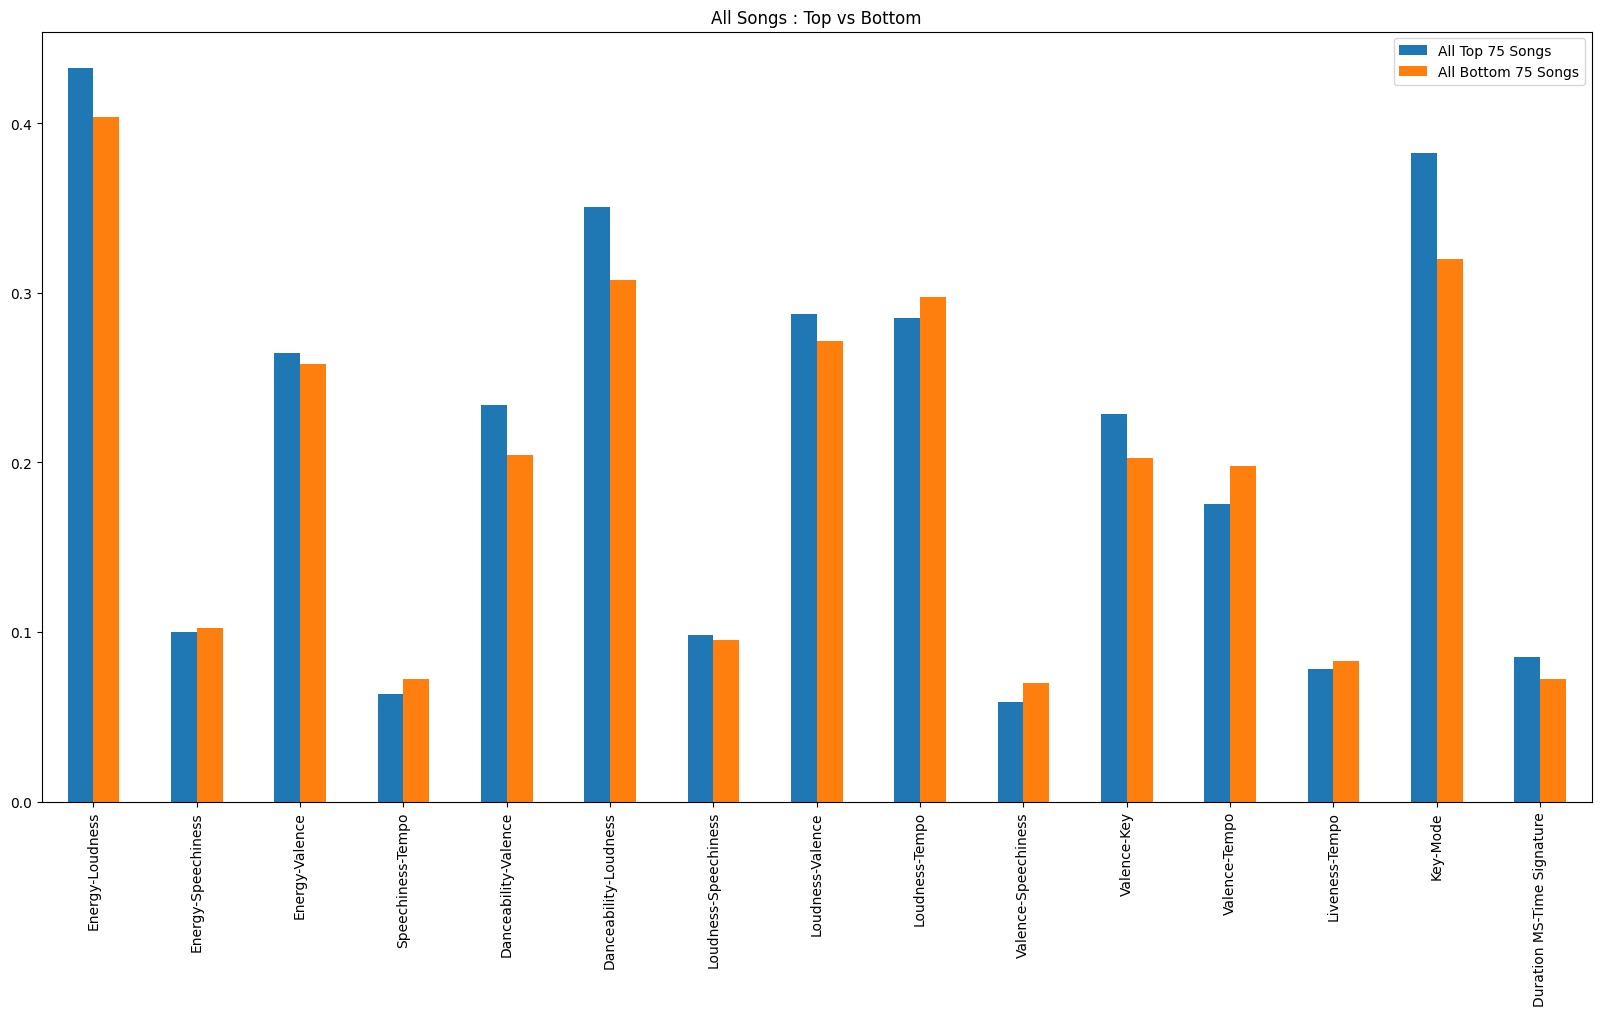

In [67]:
check = corr_alls.sort_values(by = 'Popularity',ascending=False).head(73)[[corr_fieldnames[16], corr_fieldnames[17], corr_fieldnames[18], corr_fieldnames[43], corr_fieldnames[24], corr_fieldnames[27], corr_fieldnames[29], corr_fieldnames[30], corr_fieldnames[34], corr_fieldnames[37], corr_fieldnames[38], corr_fieldnames[40], corr_fieldnames[44], corr_fieldnames[48], corr_fieldnames[51]]]
check = check.T
top = pd.DataFrame(check[check.columns].mean(axis = 1),columns = ['All Top 75 Songs'])

check = corr_alls.sort_values(by = 'Popularity',ascending=False).tail(73)[[corr_fieldnames[16], corr_fieldnames[17], corr_fieldnames[18], corr_fieldnames[43], corr_fieldnames[24], corr_fieldnames[27], corr_fieldnames[29], corr_fieldnames[30], corr_fieldnames[34], corr_fieldnames[37], corr_fieldnames[38], corr_fieldnames[40], corr_fieldnames[44], corr_fieldnames[48], corr_fieldnames[51]]]
check = check.T
bottom = pd.DataFrame(check[check.columns].mean(axis = 1),columns = ['All Bottom 75 Songs'])

# top_bottom = pd.concat([top,mid, bottom], axis = 1)
top_bottom = pd.concat([top, bottom], axis = 1)

top_bottom.plot(title = 'All Songs : Top vs Bottom', figsize=(20,10),linewidth=2,kind = 'bar' )

<AxesSubplot: title={'center': 'All Songs : Top vs Bottom'}>

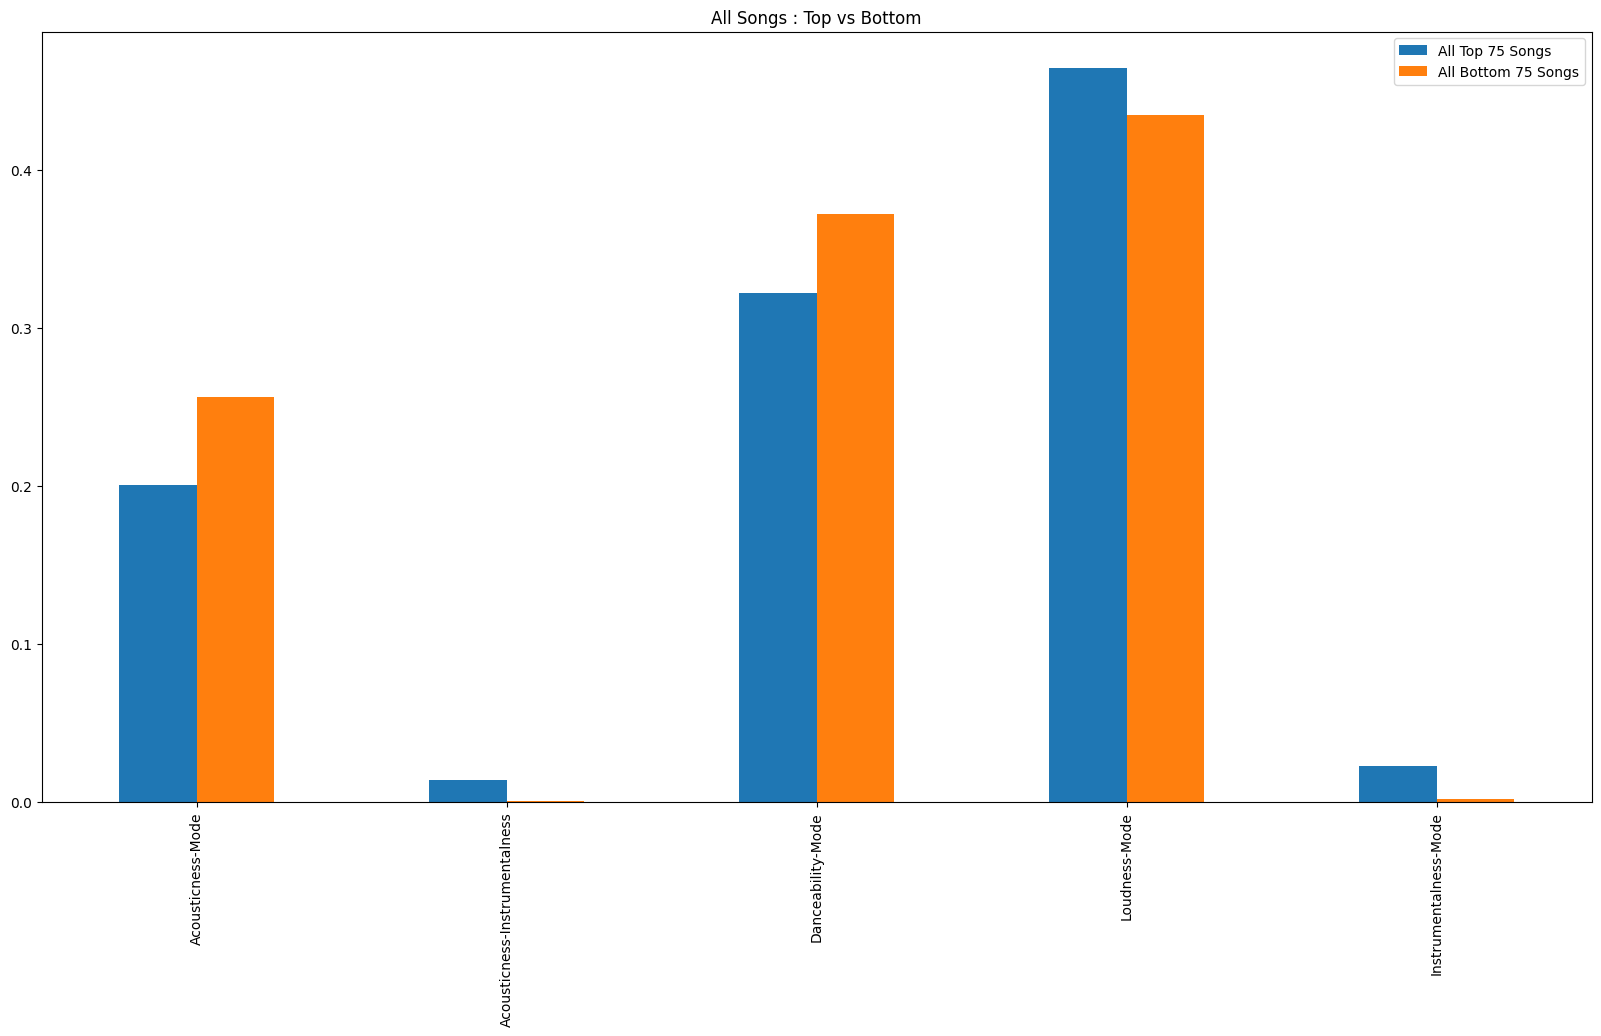

In [83]:
check = corr_bd.sort_values(by = 'Popularity',ascending=False).head(73)[[corr_fieldnames[21], corr_fieldnames[22], corr_fieldnames[26], corr_fieldnames[33], corr_fieldnames[46]]]
check = check.T
top = pd.DataFrame(check[check.columns].mean(axis = 1),columns = ['All Top 75 Songs'])

check = corr_ind.sort_values(by = 'Popularity',ascending=False).tail(73)[[corr_fieldnames[21], corr_fieldnames[22], corr_fieldnames[26], corr_fieldnames[33], corr_fieldnames[46]]]
check = check.T
bottom = pd.DataFrame(check[check.columns].mean(axis = 1),columns = ['All Bottom 75 Songs'])

# top_bottom = pd.concat([top,mid, bottom], axis = 1)
top_bottom = pd.concat([top, bottom], axis = 1)

top_bottom.plot(title = 'All Songs : Top vs Bottom', figsize=(20,10),linewidth=2,kind = 'bar' )

**Popularity : BD vs IND**

<AxesSubplot: title={'center': 'Popularity : Bd vs Ind'}>

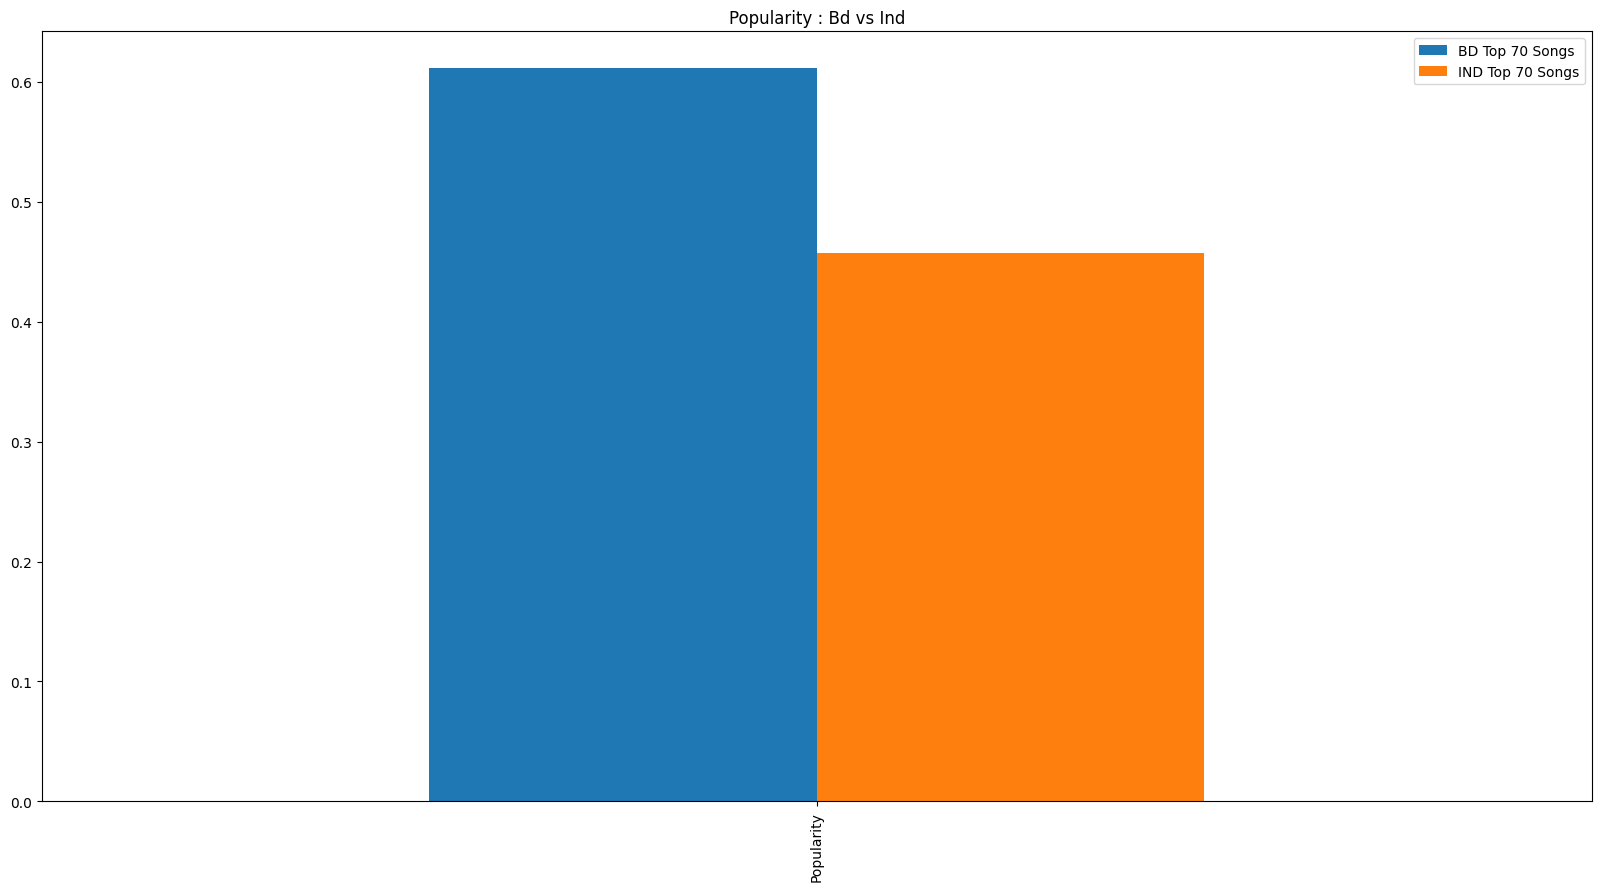

In [82]:
check = corr_bd.sort_values(by = 'Popularity',ascending=False).head(73)[['Popularity']]
check = check.T
bd_top = pd.DataFrame(check[check.columns].mean(axis = 1),columns = ['BD Top 70 Songs'])

check = corr_ind.sort_values(by = 'Popularity',ascending=False).head(73)[['Popularity']]
check = check.T
ind_top = pd.DataFrame(check[check.columns].mean(axis = 1),columns = ['IND Top 70 Songs'])

# top_bottom = pd.concat([top,mid, bottom], axis = 1)
top_bottom = pd.concat([bd_top, ind_top], axis = 1)

top_bottom.plot(title = 'Popularity : Bd vs Ind', figsize=(20,10),linewidth=2,kind = 'bar')

**Top Songs : BD vs IND**

<AxesSubplot: title={'center': 'Top Songs : BD vs IND'}>

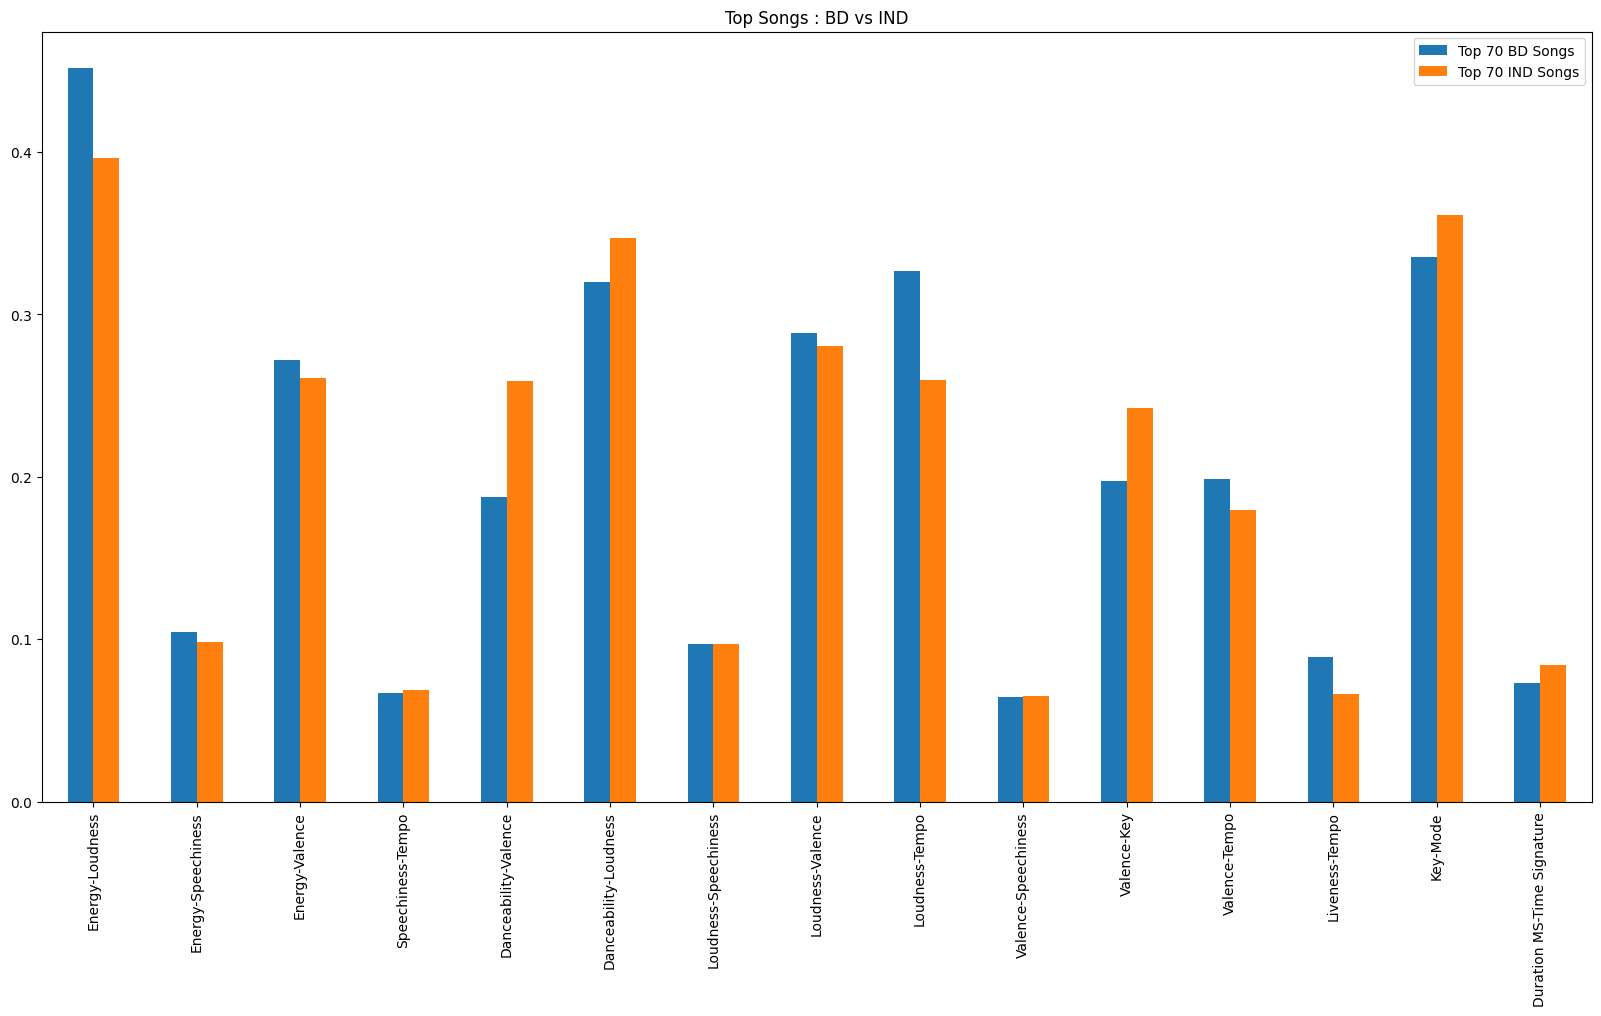

In [84]:
check = corr_bd.sort_values(by = 'Popularity',ascending=False).head(70)[[corr_fieldnames[16], corr_fieldnames[17], corr_fieldnames[18], corr_fieldnames[43], corr_fieldnames[24], corr_fieldnames[27], corr_fieldnames[29], corr_fieldnames[30], corr_fieldnames[34], corr_fieldnames[37], corr_fieldnames[38], corr_fieldnames[40], corr_fieldnames[44], corr_fieldnames[48], corr_fieldnames[51]]]
check = check.T
top = pd.DataFrame(check[check.columns].mean(axis = 1),columns = ['Top 70 BD Songs'])

check = corr_ind.sort_values(by = 'Popularity',ascending=False).head(70)[[corr_fieldnames[16], corr_fieldnames[17], corr_fieldnames[18], corr_fieldnames[43], corr_fieldnames[24], corr_fieldnames[27], corr_fieldnames[29], corr_fieldnames[30], corr_fieldnames[34], corr_fieldnames[37], corr_fieldnames[38], corr_fieldnames[40], corr_fieldnames[44], corr_fieldnames[48], corr_fieldnames[51]]]
check = check.T
bottom = pd.DataFrame(check[check.columns].mean(axis = 1),columns = ['Top 70 IND Songs'])

# top_bottom = pd.concat([top,mid, bottom], axis = 1)
top_bottom = pd.concat([top, bottom], axis = 1)

top_bottom.plot(title = 'Top Songs : BD vs IND', figsize=(20,10),linewidth=2,kind = 'bar' )